In [6]:
!python3 --version

Python 3.9.4


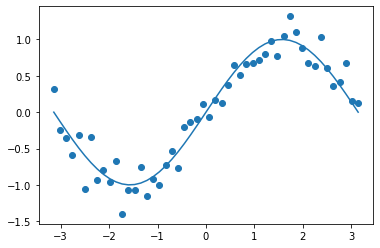

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')


def sin_with_white_noise(x, seed=1):
  """
  mean: mu = 0.0
  variance: sigma^2 = (0.2)^2 = 0.04
  """
  np.random.seed(seed=seed)
  mu = 0.0
  sigma = 0.2
  white_noise = np.random.normal(mu, sigma, len(x))
  return np.sin(x) + white_noise

x = np.linspace(-1, 1) * np.pi
y = sin_with_white_noise(x)
plt.scatter(x, y)
plt.plot(x, np.sin(x))

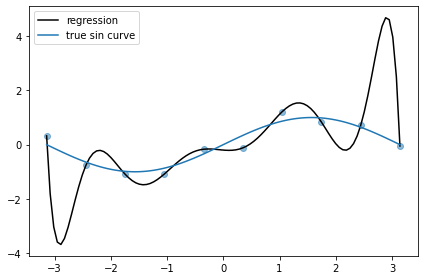

In [8]:
# Regression problem
# Maximal likelihood method

def param_estimator(cfunc, expression, target, ridge=0.0):
  row, column = len(cfunc), len(expression)
  unit_matrix = np.eye(row)
  design_matrix = np.empty([row, column])
  for i, func in enumerate(cfunc):
    for j, x in enumerate(expression):
      design_matrix[i][j] = func(x)

  inverse = np.linalg.inv( design_matrix @ design_matrix.T + ridge * unit_matrix )
  return inverse @ design_matrix @ target


def prediction(cfunc, x, param):
  phi = np.empty([len(cfunc), len(x)])
  for i, func in enumerate(cfunc):
    for j, _x in enumerate(x):
      phi[i][j] = func(_x)

  return param @ phi


fig = plt.figure()
N = 10 # Highest order of polynominal 
M = 10 # Number of Data

cfunc = [ (lambda n: lambda x: x ** n)(n) for n in range(M) ]
expression = np.linspace(-1, 1, N) * np.pi
target = sin_with_white_noise(expression)
w = param_estimator(cfunc, expression, target)

x = np.linspace(-1, 1, 100) * np.pi
y = prediction(cfunc, x, w)

plt.plot(x, y, c="black", label="regression")
plt.scatter(expression, target, alpha=0.5)
plt.plot(x, np.sin(x), label="true sin curve")
# plt.ylim(-1.2, 1.2)
plt.legend()
# plt.show()
plt.tight_layout()
# with PdfPages("images/overfitting.pdf") as pdf:
#     pdf.savefig(plt)
plt.savefig("images/overfitting.pdf")

正則化項を加えて0次から9次までの多項式でフィッティングを行う。

次数が大きくオーバーフィッティングしているところも正則化項によって振動が抑えられていることがわかる。一方で正則化項が強すぎると予言能力は下がることが見て取れる。

これはモデルの最適な複雑さ（多項式の例では次数）を選ぶことと正則化項の適切なパラメータを選ぶことが本質的には同じことを言っていることを示している。

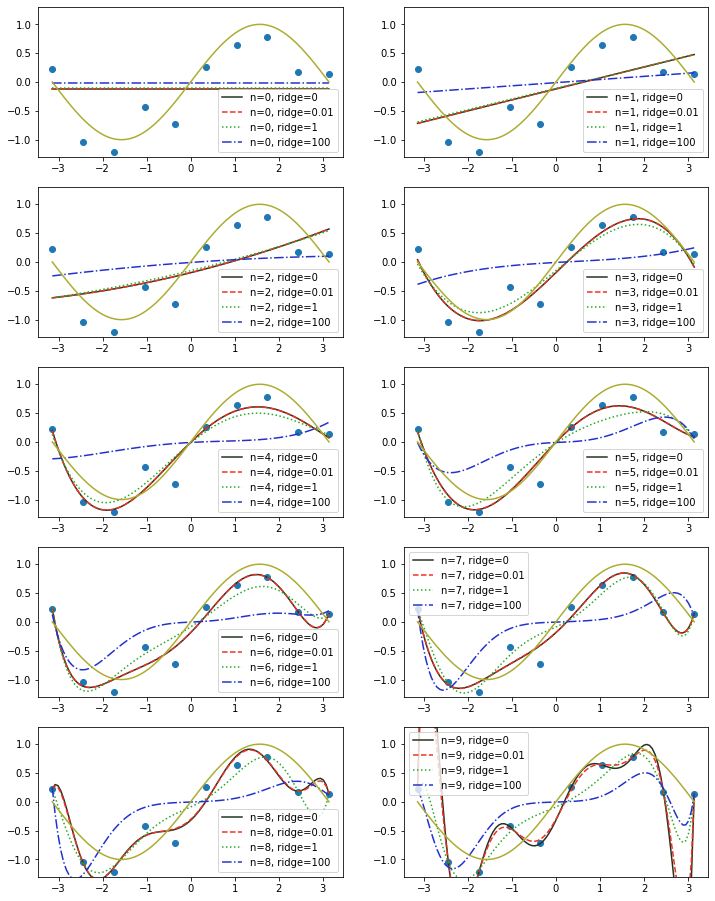

In [9]:
# fitting by polynominal function

model = [i for i in range(10)]
fig = plt.figure(figsize=(12, 16))

for n, order in enumerate(model):
  ax = fig.add_subplot(5, 2, n+1)
  N = 10
  cfunc = [ (lambda n: lambda x: x ** n)(n) for n in range(order+1) ]
  expression = np.linspace(-1, 1, N) * np.pi
  target = sin_with_white_noise(expression, seed=64)

  w = param_estimator(cfunc, expression, target)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#233122", label=f"n={order}, ridge=0")

  ridge = 0.01
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#ed3122", label=f"n={order}, ridge={ridge}", linestyle="dashed")
  ridge = 1
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#23a922", label=f"n={order}, ridge={ridge}", linestyle="dotted")

  ridge = 100
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#2331cc", label=f"n={order}, ridge={ridge}", linestyle="dashdot")

  ax.scatter(expression, target)
  ax.plot(x, np.sin(x), c="#acac31")
  ax.set_ylim(-1.3, 1.3)
  ax.legend()

特徴関数としてガウシアンを選んでフィッティングを行う。
この関数のパラメータは平均$\mu$と分散$\sigma^2$である。
$$
  \phi_i(x) = \exp\Big\{-\frac{1}{2\sigma^{2}}(x - \mu_{i})^2\Big\}
$$
この例もモデルの複雑度を上げると過学習すると大きく振動するが、正則化項によってそれが抑えられていることがわかる。
一方で分散の値が適当だと正則化項がなくても精度良く予言できている（$\sigma=2$のグラフ）。

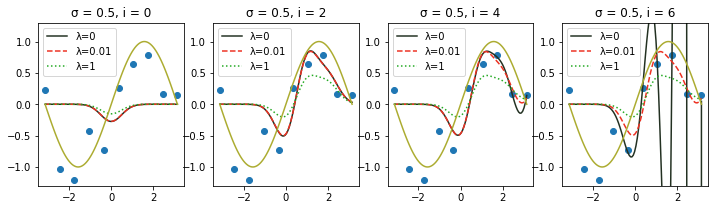

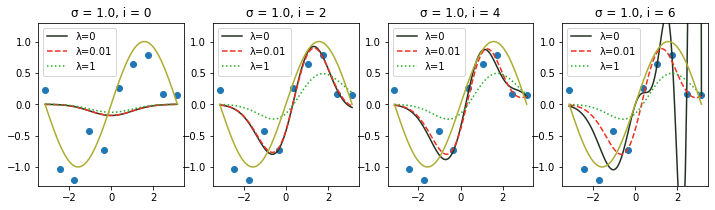

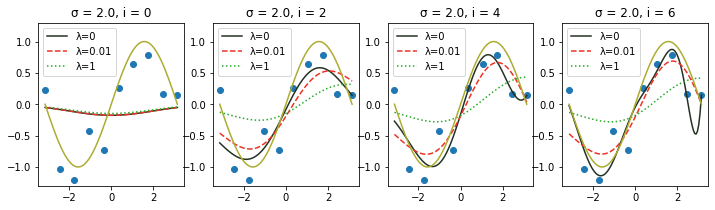

In [10]:
# fitting by Gaussian

model = [0, 1, 2, 3, 4, 5, 6]
var = [0.5, 1.0, 2.0]
# fig = plt.figure(figsize=(12, 16))


N = 10

for m, s in enumerate(var):
  fig = plt.figure(figsize=(12, 3))
  for n, order in enumerate(model):
    pos = n // 2
    if n % 2 == 0:
      ax = fig.add_subplot(1, 4, pos+1)
      cfunc = [ (lambda mu: lambda x: np.exp(-0.5 * s**(-2) * (x - mu) ** 2))(mu) for mu in range(order+1) ]
      expression = np.linspace(-1, 1, N) * np.pi
      target = sin_with_white_noise(expression, seed=64)
      
      w = param_estimator(cfunc, expression, target)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#233122", label=f"λ=0")

      ridge = 0.01
      w = param_estimator(cfunc, expression, target, ridge=ridge)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#ed3122", label=f"λ={ridge}", linestyle="dashed")
      ridge = 1
      w = param_estimator(cfunc, expression, target, ridge=ridge)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#23a922", label=f"λ={ridge}", linestyle="dotted")

      # ridge = 100
      # w = param_estimator(cfunc, expression, target, ridge=ridge)
      # x = np.linspace(-1, 1, 100) * np.pi
      # y = prediction(cfunc, x, w)

      # ax.plot(x, y, c="#2331cc", label=f"λ={ridge}", linestyle="dashdot")

      ax.scatter(expression, target)
      ax.plot(x, np.sin(x), c="#acac31")
      ax.set_ylim(-1.3, 1.3)
      ax.legend()
      ax.set_title(f"σ = {s}, i = {order}")
  
  # plt.show()

# Bayes linear regression

$$
    \def\Normal{\mathcal{N}}
    \def\data{\mathcal{D}}
$$

## Least square method

## Maximal likelihood estimation 

The parameters are determined to maximize the likelihood function
$$
    p(\tau | \chi, w, \beta) = \prod_{n=1}^{N} \Normal(t^{(n)} | w_{i} \phi_{i}(x^{(n)}), \beta^{-1}) 
    = \Big( \frac{\beta}{2\pi} \Big)^{N/2} \exp\Big\{ -\frac{\beta}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} \Big\}
$$
where $\tau = (t^{(1)}, t^{(2)}, \cdots, t^{(N)})$, $\chi = (x^{(1)}, x^{(2)}, \cdots, x^{(N)})$ are sets of the target variable and inputs $x = (x_{0}, x_{1}, \cdots, x_{d})$, $\phi_{i}(x)$ is the arbitrary function that is known the feature function, and $\beta$ is a parameter called precision which is same to the inverse of variance $\sigma^{2}$. 

The maximal likelihood estimation is one way to determine parameters $w_{i}$ due to find the maximal values.
Let us consider the negative log-likelihood function instead of ordinal one for simplicity,
$$
    f(w) \equiv -\ln p(\tau | \chi, w, \beta) = \frac{\beta}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} - \frac{N}{2} \ln \frac{\beta}{2\pi}
$$

## MAP estimation

Bayes theorem say that the posterior probability, which is a probability given the condition, is propotional to the likelihood function and prior probability, which is a probability not given the condition,
$$
    p(w | \tau, \chi, \alpha, \beta) = \frac{p(\tau | w, \chi, \beta) p(w | \chi, \alpha)}{\int d^{P}w p(\tau | w, \chi, \beta) p(w | \chi, \alpha)},
$$
where $P$ is a number of parameters or a dimension of parameter space.

The maximum a posterior (MAP) estimation is achieved to maximize this posterior probability.
In other words, parameters are determined by finding the maximam values of the posterior probability instead of likelihood function (maximal likelihood estimation).
If we assume zero means Gaussian as prior probability, the negative logarhythm of posterior probability is equal to
$$
    -\ln p(\tau | w, \chi, \beta) - \ln p(w | \chi, \alpha)
    = \frac{1}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} + \frac{1}{2} w_{i} w_{i} - \frac{N}{2} \ln \frac{\beta}{2\pi} + \frac{P}{2} \ln(2\pi) - \ln \det \alpha.
$$
$\alpha$ and $\beta$ are hyper-parameter, we focus on first two term. The optimization of this equatioin is so called Ridge regularized least square problem.

## Bayes linear regression

Assuming the Gaussian to the prior probability, the posterior probability is also Gaussian.
Actually,
$$
\begin{aligned}
    p(\tau | w, \chi, \beta) p(w | \chi, \alpha)
    &= \frac{1}{(2\pi)^{(N+M)/2}} \sqrt{\frac{1}{\det\alpha \det\beta}}
    \exp \Big\{ -\frac{1}{2} (\tau -w_{m}\Phi_{m})^{T} \beta^{-1} (\tau -w_{m}\Phi_{m})
        - \frac{1}{2} (w - m_{0})^{T} \alpha^{-1} (w - m_{0})
    \Big\}
    \\ &= \frac{1}{(2\pi)^{(N+M)/2}} \sqrt{\frac{1}{\det\alpha \det\beta}}
    \exp \Big\{ 
        - \frac{1}{2} (w - m_{N})^{T} K^{-1} (w - m_{N})
        - \frac{1}{2} (L^{T} K L - \tau^{T} \beta^{-1} \tau - m_{0}^{T} \alpha^{-1} m_{0})
    \Big\}
\end{aligned}
$$
where $\Phi_{m} = (\Phi)_{mn} = \phi_{m}(x^{(n)})$ is a design matrix,
$\alpha, \beta$ is the covariance matrix and
$$
\begin{aligned}
    m_{N} \equiv KL,
    \quad K^{-1} \equiv \alpha^{-1} + \Phi \beta^{-1} \Phi^{T},
    \quad L \equiv \alpha^{-1} m_{0} + \Phi \beta^{-1} \tau.
\end{aligned}
$$
The normalization factor, $\int d^{M}w p(\tau | w, \chi, \beta) p(w | \chi, \alpha)$, is
$$
    \frac{1}{(2\pi)^{N/2}} \sqrt{\frac{\det K}{\det \alpha \det \beta}}
    \exp\Big\{ -\frac{1}{2} (L^{T} K L - \tau^{T} \beta^{-1} \tau - m_{0}^{T} \alpha^{-1} m_{0}) \Big\}
$$
hence the posterior probability is
$$
    p(w | \tau, \chi, \alpha, \beta) = \frac{1}{(2\pi)^{M/2}} \sqrt{\frac{1}{\det K}}
    \exp\Big\{ -\frac{1}{2} (w - m_{N})^{T} K^{-1} (w - m_{N}) \Big\}
    = \Normal(w | m_{N}, K)
$$


The predictive probability
$$
\begin{aligned}
  p(t \mid x, \tau, \chi, \alpha, \beta) 
  &= \int dw p(t \mid x, w, \beta) p(w \mid \tau, \chi, \alpha, \beta)
  \\ &= \int dw \Normal(t \mid w_{i} \Phi_{i}(x), \beta) \Normal(w \mid m_{N}, K)
  \\ &= \int dw \frac{1}{(2\pi)^{(1+M)/2}} \sqrt{\frac{1}{\beta\det K}} \exp \Big\{
    -\frac{1}{2} (t - w_{m} \phi_{m})^{T} \beta^{-1} (t - w_{m} \phi_{m})
    - \frac{1}{2} (w - m_{N})^{T} K^{-1} (w - m_{N})
    \Big\}
\end{aligned}
$$

The expression in exponential is rewritten as follows:
$$
\begin{aligned}
  &(t - m_{N} \phi - (w - m_{N}) \phi)^{T} \beta^{-1} (t - m_{N} \phi - (w - m_{N}) \phi) + (w - m_{N})^{T} K^{-1} (w - m_{N})
  \\ &= (t - m_{N} \phi)^{T} \beta^{-1} (t - m_{N} \phi) - ((w - m_{N}) \phi)^{T} \beta^{-1} (t - m_{N} \phi) - (t - m_{N} \phi)^{T} \beta^{-1} (w - m_{N}) \phi + (w - m_{N})^{T} (K^{-1} + \phi \beta^{-1} \phi^{T}) (w - m_{N})
  \\ &= (t - m_{N} \phi_{i})^{T} \beta^{-1} (t - m_{N} \phi) - (w - m_{N})^{T} \tilde{L} - \tilde{L}^{T} (w - m_{N}) + (w - m_{N})^{T} \tilde{K}^{-1} (w - m_{N})
  \\ &= (t - m_{N} \phi)^{T} \beta^{-1} (t - m_{N} \phi) + (w - m_{N} - \tilde{K} \tilde{L})^{T} \tilde{K}^{-1} (w - m_{N} - \tilde{K} \tilde{L}) - \tilde{L}^{T} \tilde{K} \tilde{L}
  \\ &= (t - m_{N} \phi_{i})^{T} (\beta^{-1} - \beta^{-1} \phi^{T} \tilde{K} \phi \beta^{-1}) (t - m_{N} \phi) + (w - m_{N} - \tilde{K} \tilde{L})^{T} \tilde{K}^{-1} (w - m_{N} - \tilde{K} \tilde{L})
\end{aligned}
$$
where $\tilde{L} = \phi \beta^{-1} (t - m_{N} \phi)$ and $\tilde{K}^{-1} = K^{-1} + \phi \beta^{-1} \phi^{T}$.

Doing the integral and apply the Woodbury formula and determinant lemma $$\det(A+UWV^{T}) = \det(W^{-1} + V^{T} A^{-1} U) \det A \det W,$$ we obtain
$$
\begin{aligned}
  p(t \mid x, \tau, \chi, \alpha, \beta)
  &= \frac{1}{(2\pi)^{1/2}} \sqrt{\frac{\det \tilde{K}}{\beta\det K}} \exp\Big\{-\frac{1}{2} (t - m_{N} \phi)^{T} (\beta^{-1} - \beta^{-1} \phi^{T} \tilde{K} \phi \beta^{-1}) (t - m_{N} \phi) \Big\}
  \\ &= \frac{1}{(2\pi)^{1/2}} \sqrt{\frac{1}{\det(\beta + \phi^{T} K \phi)}} \exp\Big\{-\frac{1}{2} (t - m_{N} \phi)^{T} (\beta + \phi^{T} K \phi)^{-1} (t - m_{N} \phi) \Big\}
  \\ &= \Normal(t \mid m_{N} \phi, \sigma_{N}^{2}),
\end{aligned}
$$
where $\sigma_{N}^{2} \equiv \beta + \phi^{T} K \phi$.

In [11]:
from dataclasses import dataclass, field

@dataclass
class Train:
    inputs: list = field(default_factory=list)
    targets: list = field(default_factory=list)

train = Train()
train.inputs = [1,2,3]
train

Train(inputs=[1, 2, 3], targets=[])

In [12]:
class Distribution():
    def __init__(self):
        self.__model = None
        self.__param = None

    @property
    def model(self):
        return self.__model

    @model.setter
    def model(self, value):
        self.__model = value

    @property
    def param(self):
        return self.__param

    @param.setter
    def param(self, p):
        self.__param = p

    @property
    def mean(self):
        if self.__model == "gaussian":
            return self.__param["mean"]

    @property
    def cov(self):
        if self.__model == "gaussian":
            return self.__param["cov"]

    def normal(self, *x):
        mean = self.__param.pop("mean")
        cov = self.__param.pop("cov")
        dim = len(x)

        mean = mean * np.ones(dim) if isinstance(mean, (int, float)) else np.array(mean)
        cov = cov * np.eye(dim) if isinstance(cov, (int, float)) else np.array(cov)
        
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)

        y = x - mean
        return ( 2.0 * np.pi ) ** (-dim/2) * (det_cov) ** (-1/2) * np.exp( -0.5 * y @ inv_cov @ y )
        


dist = Distribution()
dist.model = "gaussian"
dist.param = {"mean": 0, "cov": 10}
dist.mean, dist.cov


(0, 10)

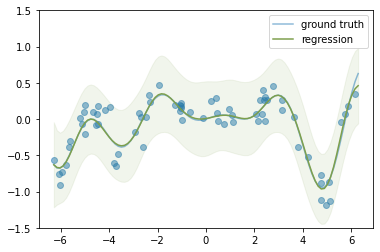

In [13]:
@dataclass
class Inference():
    # __slots__ = ('inference', 'train', '__features', '__design_matrix')
    method: str
    train: Train

    # def __post_init__(self, inference: str, train: Train):
    def __post_init__(self):
        # self.inference = inference
        # self.train = train
        self.__features = None
        self.__design_matrix = None
        self.__likelihood = Distribution()
        self.__prior_distribution = Distribution()

    @property
    def features(self):
        return self.__features

    @features.setter
    def features(self, features):
        self.__features = features
        self.__design_matrix = design_matrix(features, x)

    @property
    def design_matrix(self):
        return self.__design_matrix

    @property
    def likelihood(self):
        return self.__likelihood

    @property
    def prior_distribution(self):
        return self.__prior_distribution


def design_matrix(features, inputs):
    row, column = len(features), len(inputs)
    matrix = np.empty([row, column])
    for i, func in enumerate(features):
        for j, var in enumerate(inputs):
            matrix[i][j] = func(var)

    return matrix


class LinearRegression():
    def __init__(self, inference: Inference, **kwargs):
        self.inference = inference

    def maximal_likelihood(self):
        ...
        # return self.maximal_posterior(ridge=0)

    def maximal_posterior(self):
        unit_mat = np.eye(len(self.inference.features))
        regulator = self.inference.prior_distribution.cov
        inverse = np.linalg.inv(
            self.inference.design_matrix @ self.inference.design_matrix.T + regulator * unit_mat
        )
        param = inverse @ self.inference.design_matrix @ self.inference.train.targets
        return param

    def bayesian(self):
        unit_mat = np.eye(len(self.inference.features))
        regulator = self.inference.prior_distribution.cov
        beta = self.inference.likelihood.cov
        kern = np.linalg.inv(
            beta**(-1) * self.inference.design_matrix @ self.inference.design_matrix.T + regulator**(-1) * unit_mat
        )

        mean = beta**(-1) * kern @ self.inference.design_matrix @ self.inference.train.targets
        return mean, kern

    def regression(self, x):
        if self.inference.method == 'ml':
            pass

        elif self.inference.method == 'map':
            w_estimated = self.maximal_posterior()
            return w_estimated @ design_matrix(self.inference.features, x)

        elif self.inference.method == 'bayesian':
            mn, kern = self.bayesian()
            mean = mn @ design_matrix(self.inference.features, x)
            variance = np.ones(len(x)) * self.inference.likelihood.cov
            for i, val in enumerate(x):
                variance[i] += design_matrix(self.inference.features, [val]).T @ kern @ design_matrix(self.inference.features, [val])

            return mean, variance

        else:
            raise ValueError("no such value")

    def plot(self, x, y, ubound=None, lbound=None, **kwargs):
        import matplotlib.pyplot as plt
        return plt.plot(x, y)


if __name__ == '__main__':

    np.random.seed(seed=1)
    # x = 2*np.pi*np.linspace(-1, 1)
    x = 2.0 * np.pi * np.sort(2*np.random.rand(72)-1)
    # y = np.sin(x) + np.cos(2*x)
    fn = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
    y = fn(x)
    plt.scatter(x, y+np.random.normal(0, 0.2, len(x)), alpha=0.5)

    train = Train(targets=y, inputs=x)

    inference = Inference("bayesian", train=train)
    inference.likelihood.model = 'gaussian'
    inference.likelihood.param = {"mean": 0, "cov": 0.2}

    inference.prior_distribution.model = 'gaussian'
    inference.prior_distribution.param = {"mean": 0, "cov": 10}

    # inference.features = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: np.sin(x), lambda x: np.cos(x)]
    inference.features = [ (lambda n: lambda x: 5*np.exp(-(x-n)**2))(n) for n in range(-7,7) ]
    # print(f"design matrix:\n {inference.design_matrix}")

    rg = LinearRegression(inference=inference)
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, var = rg.regression(x)

    plt.plot(x, fn(x), alpha=0.5, label="ground truth")

    plt.plot(x, y, label="regression", c="#7d9f4c")
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)
    plt.fill_between(x, y + np.sqrt(var), y - np.sqrt(var), alpha=0.1, color="#7d9f4c")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

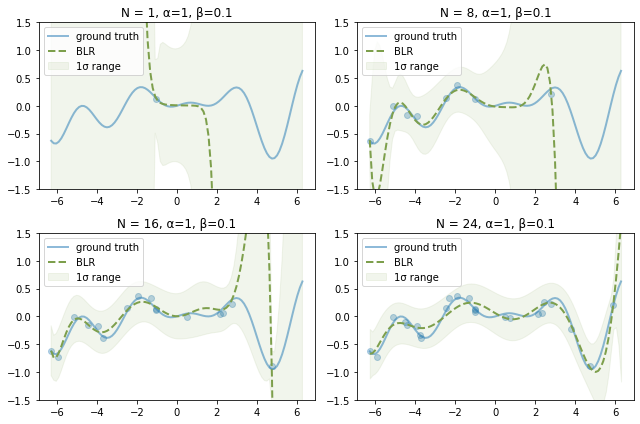

In [14]:
from matplotlib.backends.backend_pdf import PdfPages

np.random.seed(seed=1)
N = 24
train_x = 2.0 * np.pi * (2*np.random.rand(N)-1)
noise = np.random.normal(0, 0.1, N)
target = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
fig = plt.figure(figsize=(9,6))
fname = "bayesian_linear_regression.pdf"

for i, n in enumerate([1, 8, 16, 24]):
    ax = fig.add_subplot(2, 2, i+1)
    x = train_x[:n]
    y = target(x)
    ax.scatter(x, y+noise[:n], alpha=0.3)

    train = Train(targets=y, inputs=x)
    inference = Inference("bayesian", train=train)
    inference.likelihood.model = 'gaussian'
    inference.likelihood.param = {"mean": 0, "cov": 0.1}

    inference.prior_distribution.model = 'gaussian'
    inference.prior_distribution.param = {"mean": 0, "cov": 1}

    inference.features = [(lambda n: lambda x: x ** n)(n) for n in range(10)]
    # inference.features = [ (lambda n: lambda x: 5*np.exp(-(x-n)**2))(n) for n in range(-7,7) ]
    # print(f"design matrix:\n {inference.design_matrix}")

    rg = LinearRegression(inference=inference)
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, var = rg.regression(x)

    ax.plot(x, fn(x), alpha=0.5, label="ground truth", linewidth=2)

    ax.plot(x, y, label="BLR", c="#7d9f4c", linestyle="--", linewidth=2)
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)
    ax.fill_between(x, y + np.sqrt(var), y - np.sqrt(var), alpha=0.1, color="#7d9f4c", label="1σ range")
    ax.set_ylim(-1.5, 1.5)
    ax.legend()
    ax.set_title(f"N = {n}, α=1, β=0.1")

plt.tight_layout()
plt.show()
with PdfPages("images/"+fname) as pdf:
    pdf.savefig(fig)

# Gaussian process

## Conditional normal distribution

Consider the normal distribution $\Normal(x \mid \mu, \Sigma)$ where $x$ and means $\mu$ are $D$-dimensional vectors and $\Sigma$ is the covariant matrix.
Here we consider the splitting $x = (x_{1}, x_{2}, \cdots, x_{D})$ to $x_{a} = (x_{1}, \cdots, x_{M})$ and
$x_{b} = (x_{1}, \cdots, x_{D-M})$. Similary, the means and covariance matrix is splitted by
$$
  \mu = (\mu_{a}, \mu_{b}),
  \quad
  \Sigma = \begin{pmatrix}
    \Sigma_{aa} & \Sigma_{ab} \\
    \Sigma_{ba} & \Sigma_{bb}
  \end{pmatrix},
  \quad
  \Sigma^{-1} = \begin{pmatrix}
    \Lambda_{aa} & \Lambda_{ab} \\
    \Lambda_{ba} & \Lambda_{bb}
  \end{pmatrix},
$$
and the precision matrix $\Lambda = \Sigma^{-1}$ is introduced.
Use the completing the square
$$
  x^{T} A x + B^{T} x + x^{T} B = (x + A^{-1} B)^{T} A (x + A^{-1} B) - B^{T} A^{-1} B,
$$
we have
$$
\begin{aligned}
  \Normal(x | \mu, \Sigma)
  &= \frac{1}{(2\pi)^{D/2}} \frac{1}{\sqrt{\det \Sigma}} \exp\Big\{ -\frac{1}{2} (x - \mu)^{T} \Sigma^{-1} (x - \mu) \Big\}
  \\ &= \frac{1}{(2\pi)^{D/2}} \frac{1}{\sqrt{\det \hat{\Sigma}_{aa}}} \frac{1}{\sqrt{\det \Sigma_{bb}}} \exp\Big\{ -\frac{1}{2} (x_{a} - \hat{\mu}_{a})^{T} \hat{\Sigma}^{-1}_{aa} (x_{a} - \hat{\mu}_{a}) -\frac{1}{2} (x_{b} - \mu_{b})^{T} \Sigma^{-1}_{bb} (x_{b} - \mu_{b}) \Big\}
\end{aligned}
$$
so that the joint normal distribution can split the conditional and prior's one,
$$
  \Normal(x_{a}, x_{b} | \mu, \Sigma) = \Normal(x_{a} | \hat{\mu}_{a}, \hat{\Sigma}_{aa}) \Normal(x_{b} | \mu_{b}, \Sigma_{bb})
$$
where we define
$$
\begin{aligned}
  \hat{\mu}_{a} &\equiv \mu_{a} + \Sigma_{ab} \Sigma^{-1}_{bb} (x_{b} - \mu_{b}), \\
  \hat{\Sigma}_{aa} &\equiv \Sigma_{aa} - \Sigma_{ab} \Sigma^{-1}_{bb} \Sigma_{ba},
\end{aligned}
$$
and the inverse
$$
  \begin{pmatrix}
    A & B \\
    C & D
  \end{pmatrix}^{-1}
  = \begin{pmatrix}
    M & -M B D^{-1} \\
    -D^{-1} C M & D^{-1} + D^{-1} C M B D^{-1}
  \end{pmatrix}
$$
where $M = (A - B D^{-1} C)^{-1}$ is Schur complement matrix, and the determinant of block matrix
$$
  \det \begin{pmatrix}
    A & B \\
    C & D
  \end{pmatrix}
  = \det M^{-1} \det D
$$
Integrate out w.r.t. $x_{b}$, we obtain
$$
  \int dx_{b} \Normal(x_{a}, x_{b} | \mu, \Sigma) = \frac{1}{(2\pi)^{M/2}} \frac{1}{\sqrt{\det \Sigma_{aa}}}
  \exp \Big\{-\frac{1}{2} (x_{a} - \mu_{a})^{T} \Sigma_{aa}^{-1} (x_{a} - \mu_{a}) \Big\}
  = \Normal(x_{a} | \mu_{a}, \Sigma_{aa})
$$

## Gaussian process regression


$$
  y = f(x).
$$
From the point of Gaussian process view, $y$ is generated by the infinite-dimensional normal distribution $\Normal(f(x) | \mu(x), K(x,x))$.
Here we obserbed the data $(x_{*}, y_{*}) = \{(x_{1}, y_{1}), (x_{2}, y_{2}), \cdots, (x_{N}, y_{N})\}$, and we want to predict $y$ of new input $x$. This predictional distribution is the conditional normal distribution.
The normal distribution and conditional one obey that
$$
  \Normal \Bigg(
    f(x), f(x_{*}) \Bigg|
    (\mu(x), \mu_{*}),
    \begin{pmatrix}
      K(x, x) & K(x, x_{*}) \\
      K(x_{*}, x) & K(x_{*}, x_{*})
    \end{pmatrix}
  \Bigg)
  = \Normal\big(f(x) | \hat{\mu}(x), \hat{K}(x, x)\big) \Normal\big(f(x_{*}) | \mu_{*}, K(x_{*}, x_{*})\big)
$$
where
$$
  \hat{\mu}(x) = \mu(x) + K(x, x_{*}) K(x_{*}, x_{*})^{-1} (f(x_{*}) - \mu(x_{*})),
  \\ \hat{K}(x, x) = K(x, x) - K(x, x_{*}) K(x_{*}, x_{*})^{-1} K(x_{*}, x).
$$
Note that $K(x, x_{*})$, $K(x_{*}, x)$ are $N$-dimensional vector function of $x$ and $K(x_{*}, x_{*})$ is already the $N \times N$ matrix, however, $K(x,x)$ is still infinite-dimensional.

The mean function $\mu(x)$ is arbitrary and covariance function $K(x,x')$ is also arbitrary but semi-positive symmetric, the choise of these function affect the performance of the regression.
For the mean function, we often use $\mu(x) = 0$ (no bias). For the covariance function, or kernel function, any form are proposed.

* Gaussian kernel (or radial basis function, RBF): $k(x, x') = \theta_{1} e^{-\theta_{2}(x-x')^2}$
* linear kernel: $k(x, x') = x^{T} x'$
* exponential kernel: $k(x, x') = e^{-\theta |x - x'|}$
* periodic kernel: $k(x, x') = \exp\big\{\theta_{1} \cos(\theta_{2} |x-x'|)\big\}$
* Matern kernel:
$$
  K_{\nu}(x, x') = \frac{2^{1-\nu}}{\Gamma(\nu)} r^{\nu} K_{\nu} (r),
  \qquad
  r = \frac{\sqrt{2\nu}|x - x'|}{\theta}
$$

where $K_{\nu}$ is the modified Bessel function of second kind. If $\nu=1/2$ or $\nu = \infty$, Matern kernel is corresponds to the exponential or Gaussian ones, else $\nu=3/2$ or $\nu=5/2$ case are called Matern3, Matern5. Note that the combination of kernel function is also kernel function because it satisfy the semi-positive and symmetric.

For realistic experiments, the effect of the unexpected noise is inevitable. 
$$
  y = f(x) + \varepsilon,
$$
where $\varepsilon$, that is called the white noise, is generated by the normal distribution $\Normal(\varepsilon|0, \beta)$.
The function $f(x)$ and $\varepsilon$ are independent, it is found that
$$
  \mathbb{E}[y] = \mathbb{E}[f(x)] + \mathbb{E}[\varepsilon] = \mu(x),
  \\ \mathrm{var}[y] = \mathrm{var}[f(x)] + \mathrm{var}[\varepsilon] = K(x,x) + \beta,
$$ 
Using the principle of maximum entropy, the prior distribution of $y$ is
$$
  y \sim \Normal(y | \mu(x), K(x,x) + \beta),
$$
then the posterior distribution is obtained by $\Normal(y | \hat{\mu}(x), \hat{K}(x, x))$ and
$$
  \hat{\mu}(x) = \mu(x) + K(x, x_{*}) [K(x_{*}, x_{*}) + \sigma^{2}]^{-1} (f(x_{*}) - \mu(x_{*})),
  \\ \hat{K}(x, x) = K(x, x) + \sigma^{2} - K(x, x_{*}) [K(x_{*}, x_{*}) + \sigma^{2}]^{-1} K(x_{*}, x).
$$
where we assume the $\beta = \diag(\sigma^{2})$.

## Hyper-parameter optimization

## Kernel trick

Let us reconsider the linear regression
$$
  y = w_{i} \phi_{i}(x),
$$
where $\phi_{i}(x)$ is the feature function. If $N$ data set, $D=\{(x_{0}, y_{0}), (x_{1}, y_{1}), \cdots, (x_{N}, y_{N})\}$ is obtained, we have
$$
  y_{n} = w_{i} \phi_{i}(x_{n}) \equiv w_{i} \Phi_{in},
$$
where $\Phi_{in}$ is the design matrix.

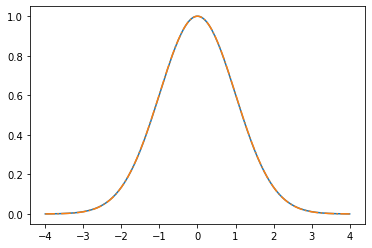

In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def matern(nu, x, theta):
    r = np.sqrt(2*nu) * np.abs(x) / theta
    return 2**(1-nu) / sp.special.gamma(nu) * r**nu * sp.special.kv(nu, r)


psuedo_infinity = 100
x = np.linspace(-4, 4, 200)
for n in [psuedo_infinity]:
    plt.plot(x, matern(n, x, 1))
    plt.plot(x, np.exp(-x**2/2), linestyle="-.")

In [15]:
def rbf(x, y, alpha=1, beta=1):
    z = x - y
    return alpha * np.exp(-beta**(-1) * z**2)

def toarray(value):
    if (s:= np.shape(value)) == ():
        return np.array([value])
    else:
        return np.array(value).reshape(s)

def kernel(x, y, model="rbf", *args):
    model = rbf
    # cast, (int, float, list) -> np.array
    x, y = list(map(toarray, [x, y]))

    row, column = len(x), len(y)
    K = np.empty([row, column])
    for i in range(row):
        for j in range(column):
            K[i][j] = model(x[i], y[j], *args)

    return K


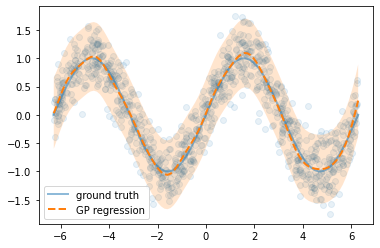

In [23]:
from dataclasses import dataclass, field
from collections.abc import Sequence
from numbers import Number
import numpy as np


@dataclass
class Train:
    inputs: list = field(default_factory=list)
    targets: list = field(default_factory=list)

class LinearRegression():
    def __init__(self, model: str, train: Train, **kwargs):
        self.model = model
        self.train = train
        self.noiseMean, self.noiseVar = kwargs.pop("noise", (0.0, 0.0)) 

    def regression(self, x):
        if self.model == "gaussian":
            z = self.train.inputs
            fz = self.train.targets
            kxz = kernel(x, z)
            kzz = kernel(z, z)
            lzz = np.linalg.inv(kzz + self.noiseVar**2 * np.eye(len(z))) # precision matrix, O(N^3)
            mean = kxz @ lzz @ fz
            cov = kernel(x, x) + self.noiseVar**2 * np.eye(len(x)) - kxz @ lzz @ kxz.T
            return mean, cov



if __name__ == '__main__':
    import matplotlib.pyplot as plt

    np.random.seed(seed=1)
    N = 1000
    x = 2.0 * np.pi * np.sort(2*np.random.rand(N)-1)
    # fn = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
    fn = lambda x: np.sin(x)
    y = fn(x) + np.random.normal(0, 0.3, N)
    # plt.scatter(x, y+np.random.normal(0, 0.2, len(x)), alpha=0.5)
    plt.scatter(x, y, alpha=0.1)

    rg = LinearRegression(model="gaussian", train=Train(inputs=x, targets=y), noise=(0.0, 0.3))
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, cov = rg.regression(x)
    var = np.diag(cov)

    plt.plot(x, fn(x), alpha=0.5, label="ground truth", linewidth=2)

    plt.plot(x, y, label="GP regression", linestyle="--", linewidth=2)
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)

    plt.fill_between(x, y + 2*np.sqrt(var), y - 2*np.sqrt(var), alpha=0.2)
    # plt.fill_between(x, y + 2*np.sqrt(var), y - 2*np.sqrt(var), alpha=0.1)
    # plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()
    # print(np.diag(var))

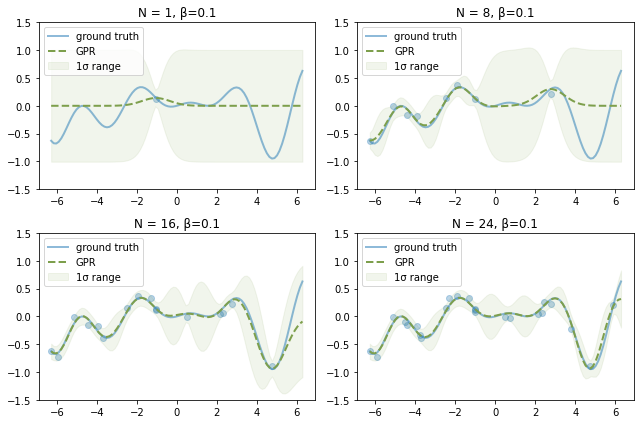

In [24]:
from matplotlib.backends.backend_pdf import PdfPages

np.random.seed(seed=1)
N = 24
train_x = 2.0 * np.pi * (2*np.random.rand(N)-1)
noise = np.random.normal(0, 0.1, N)
target = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
fig = plt.figure(figsize=(9,6))
fname = "gaussian_process_regression.pdf"

for i, n in enumerate([1, 8, 16, 24]):
    ax = fig.add_subplot(2, 2, i+1)
    x = train_x[:n]
    y = target(x)
    ax.scatter(x, y+noise[:n], alpha=0.3)

    rg = LinearRegression(model="gaussian", train=Train(inputs=x, targets=y), noise=(0, 0.1))
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, cov = rg.regression(x)
    var = np.diag(cov)

    ax.plot(x, target(x), alpha=0.5, label="ground truth", linewidth=2)

    ax.plot(x, y, label="GPR", c="#7d9f4c", linestyle="--", linewidth=2)
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)
    ax.fill_between(x, y + np.sqrt(var), y - np.sqrt(var), alpha=0.1, color="#7d9f4c", label="1σ range")
    ax.set_ylim(-1.5, 1.5)
    ax.legend()
    ax.set_title(f"N = {n}, β=0.1")

plt.tight_layout()
plt.show()
with PdfPages("images/"+fname) as pdf:
    pdf.savefig(fig)

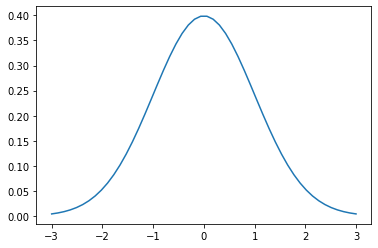

In [18]:
def foo(x, mean, std):
    return np.exp(-0.5*(x-mean)**2/std**2) / (std * (np.sqrt(2*np.pi)))

x = np.linspace(-3, 3)
y = foo(x, mean=0, std=1)
plt.plot(x, y)

In [19]:
from scipy.integrate import quad

fn = lambda s: quad(foo, -s, s, args=(0,1))[0]

z = np.array([1,2,3,4,5,6])
# plt.plot(s, fn(s)[0])
ufn = np.frompyfunc(fn, 1, 1)
ufn(z)

array([0.682689492137086, 0.9544997361036417, 0.9973002039367399,
       0.9999366575163339, 0.9999994266968564, 0.9999999980268247],
      dtype=object)

# Bayesian optimization (bo)

$$
  \DeclareMathOperator*{\argmax}{\arg\max} 
  \DeclareMathOperator*{\argmin}{\arg\min}
$$

bo = surrogate methods with bayesian statistics.

>
* focus on solving the problem $$x = \argmax_{x \in A} f(x)$$
* $x$ is in $\mathbb{R}^d$ for a value of $d$ that is not too large.
* $A$ is a simple set. Typically $A$ is a $\{x \in \mathbb{R}^{d}: a_{i} \leq x_{i} \leq b_{i}\}$ or $\{x \in \mathbb{R}^{d}: \sum x_{i} = 1\}$. More relaxed one is ok.
* The objective function $f$ is continuous. Required to model using GP regression.
* $f$ is expensive to evaluate and black box, no derivatives

>
**Pros:** The ability to optimize expensive black-box derivative-free functions makes BayesOpt extremely veratile.

Bo consists of two main components: modeling the objective function and acquisition function for deciding where to sample next.

## Algorithm 1

1. Place a Gaussian process prior on $f$
2. Observe $f$ at $n_0$ points according to an initial space-filling experimental design. Set $n=n_{0}$


In [ ]:
class BayesianOptimization():

    """
    bo = BayesianOptimization(train=train)
    bo.ei(n=100)
    """

    def __init__(self, ker="gaussian", mu="zero", train, **kwargs):
        self.kernel = Kernel(model=ker)
        self.mean = Mean(model=mu)

    def ei(self):
        ...

    def pi(self):
        ...

    def ucb(self):
        ...

In [23]:
class Mean():
    def __call__(self, x):
        return 0

class Kernel():
    def __call__(self, x, y):
        return "call"*x*y

    def __init__(self, model, *args):
        self.model = model

    def gaussian(self, x, y):
        ...

    def linear(self, x, y):
        ...

    def exp(self, x, y):
        ...

    def periodic_gaussian(self, x, y):
        ...

    def matern3(self, x, y):
        ...

    def matern5(self, x, y):
        ...

    def matern(self, x, y):
        ...

foo = Foo()
foo(2, 3)

'callcallcallcallcallcall'

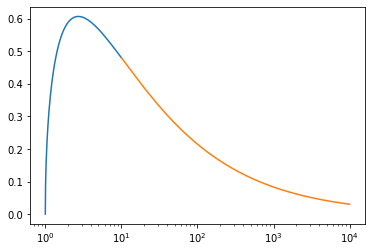

In [34]:
n = np.linspace(1, 10, 1000)
plt.plot(n, np.sqrt(np.log(n)/n))
n = np.linspace(10, 10000, 1000)
plt.plot(n, np.sqrt(np.log(n)/n))
plt.xscale("log")